In [1]:
# Importazione delle librerie necessarie
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

model = load_model('CNN_Test.keras')

2024-05-29 12:49:04.039614: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-29 12:49:04.880597: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-05-29 12:49:05.916593: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-29 12:49:05.917031: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Fo

In [2]:
img_height, img_width = 200, 200

# Generatore di dati per il test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'TEST',
    target_size=(img_height, img_width),
    batch_size=24,
    class_mode='categorical')

labels = test_generator.class_indices
label_names = list(labels.keys())

Found 120 images belonging to 5 classes.


In [3]:
# Estrai le predizioni, ovvero il valore massimo per ogni array nell'array preds ed estraendo l'indice + 1
preds = model.predict(test_generator)
predictions = np.argmax(preds, axis=1)

# Mostra le occorrenze di ogni classe
unique, counts = np.unique(predictions, return_counts=True)
occurrences = dict(zip(unique, counts))
print(occurrences)

/home/mrheltic/.local/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step
{0: 24, 1: 24, 2: 24, 3: 24, 4: 24}


Accuracy:  0.16666666666666666


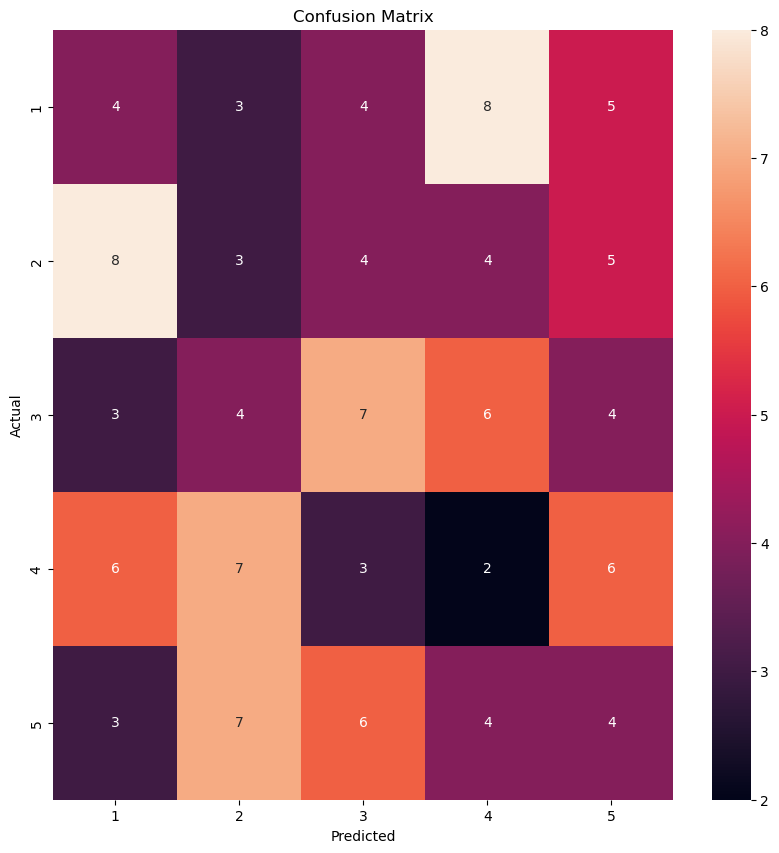

In [4]:
# Calcola l'accuratezza
accuracy = np.sum(predictions == test_generator.classes) / len(predictions)
print("Accuracy: ", accuracy)

# Mostra la matrice di confusione
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_generator.classes, predictions)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=label_names, yticklabels=label_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()